<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/33_PCA_Insights_Simplifying_Glass_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>PCA Insights: Simplifying Glass Dataset</b></div>




# *Project overview*

- The aim of this project is to use Principal Component Analysis (PCA) exclusively for dimensionality reduction on the Glass Identification Data Set from UCI. This dataset consists of 214 instances and 9 attributes related to glass composition. By applying PCA, the project seeks to simplify the dataset while retaining its essential characteristics, facilitating further analysis of glass classification.

 ### Source Information:

- Dataset: Glass Identification Data Set
- Origin: UCI Machine Learning Repository
- Creator: B. German, Central Research Establishment, Home Office Forensic Science Service, Aldermaston, Reading, Berkshire RG7 4PN
- Donor: Vina Spiehler, Ph.D., DABFT, Diagnostic Products Corporation
- Acknowledgements: For more information, visit UCI Glass Identification Dataset.

# *1.Import Library*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# *2.Import Dataset*

In [ ]:
df=pd.read_csv('Desktop/glass.csv')
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

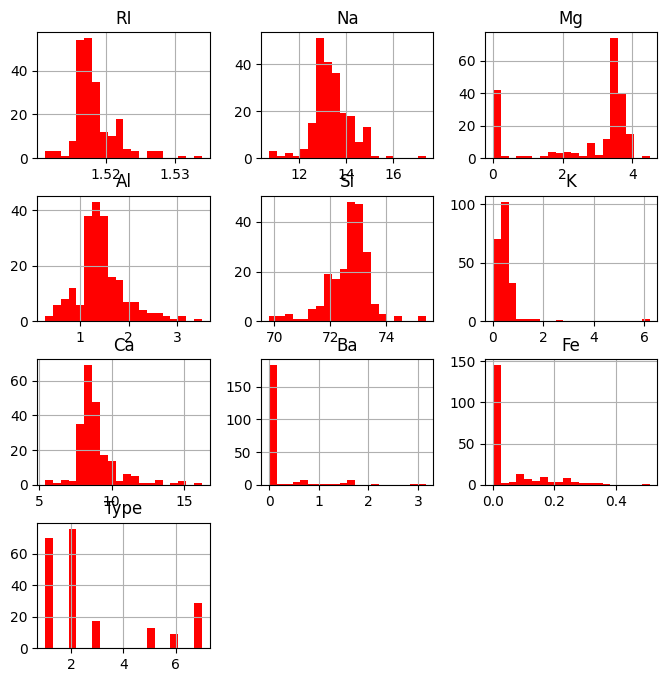

In [ ]:
df.hist(bins=20,figsize=(8,8),color='r')

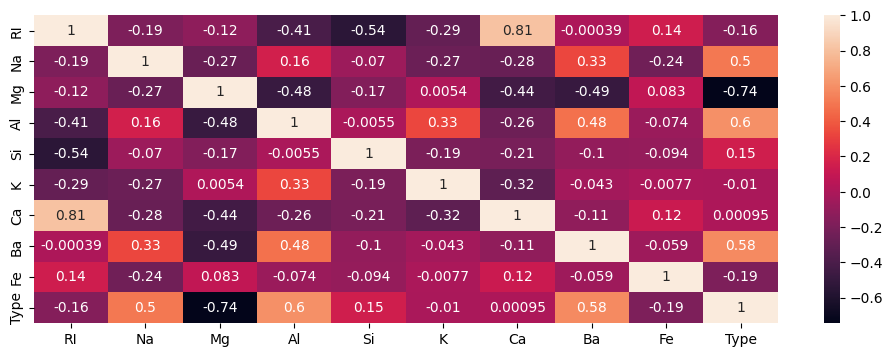

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

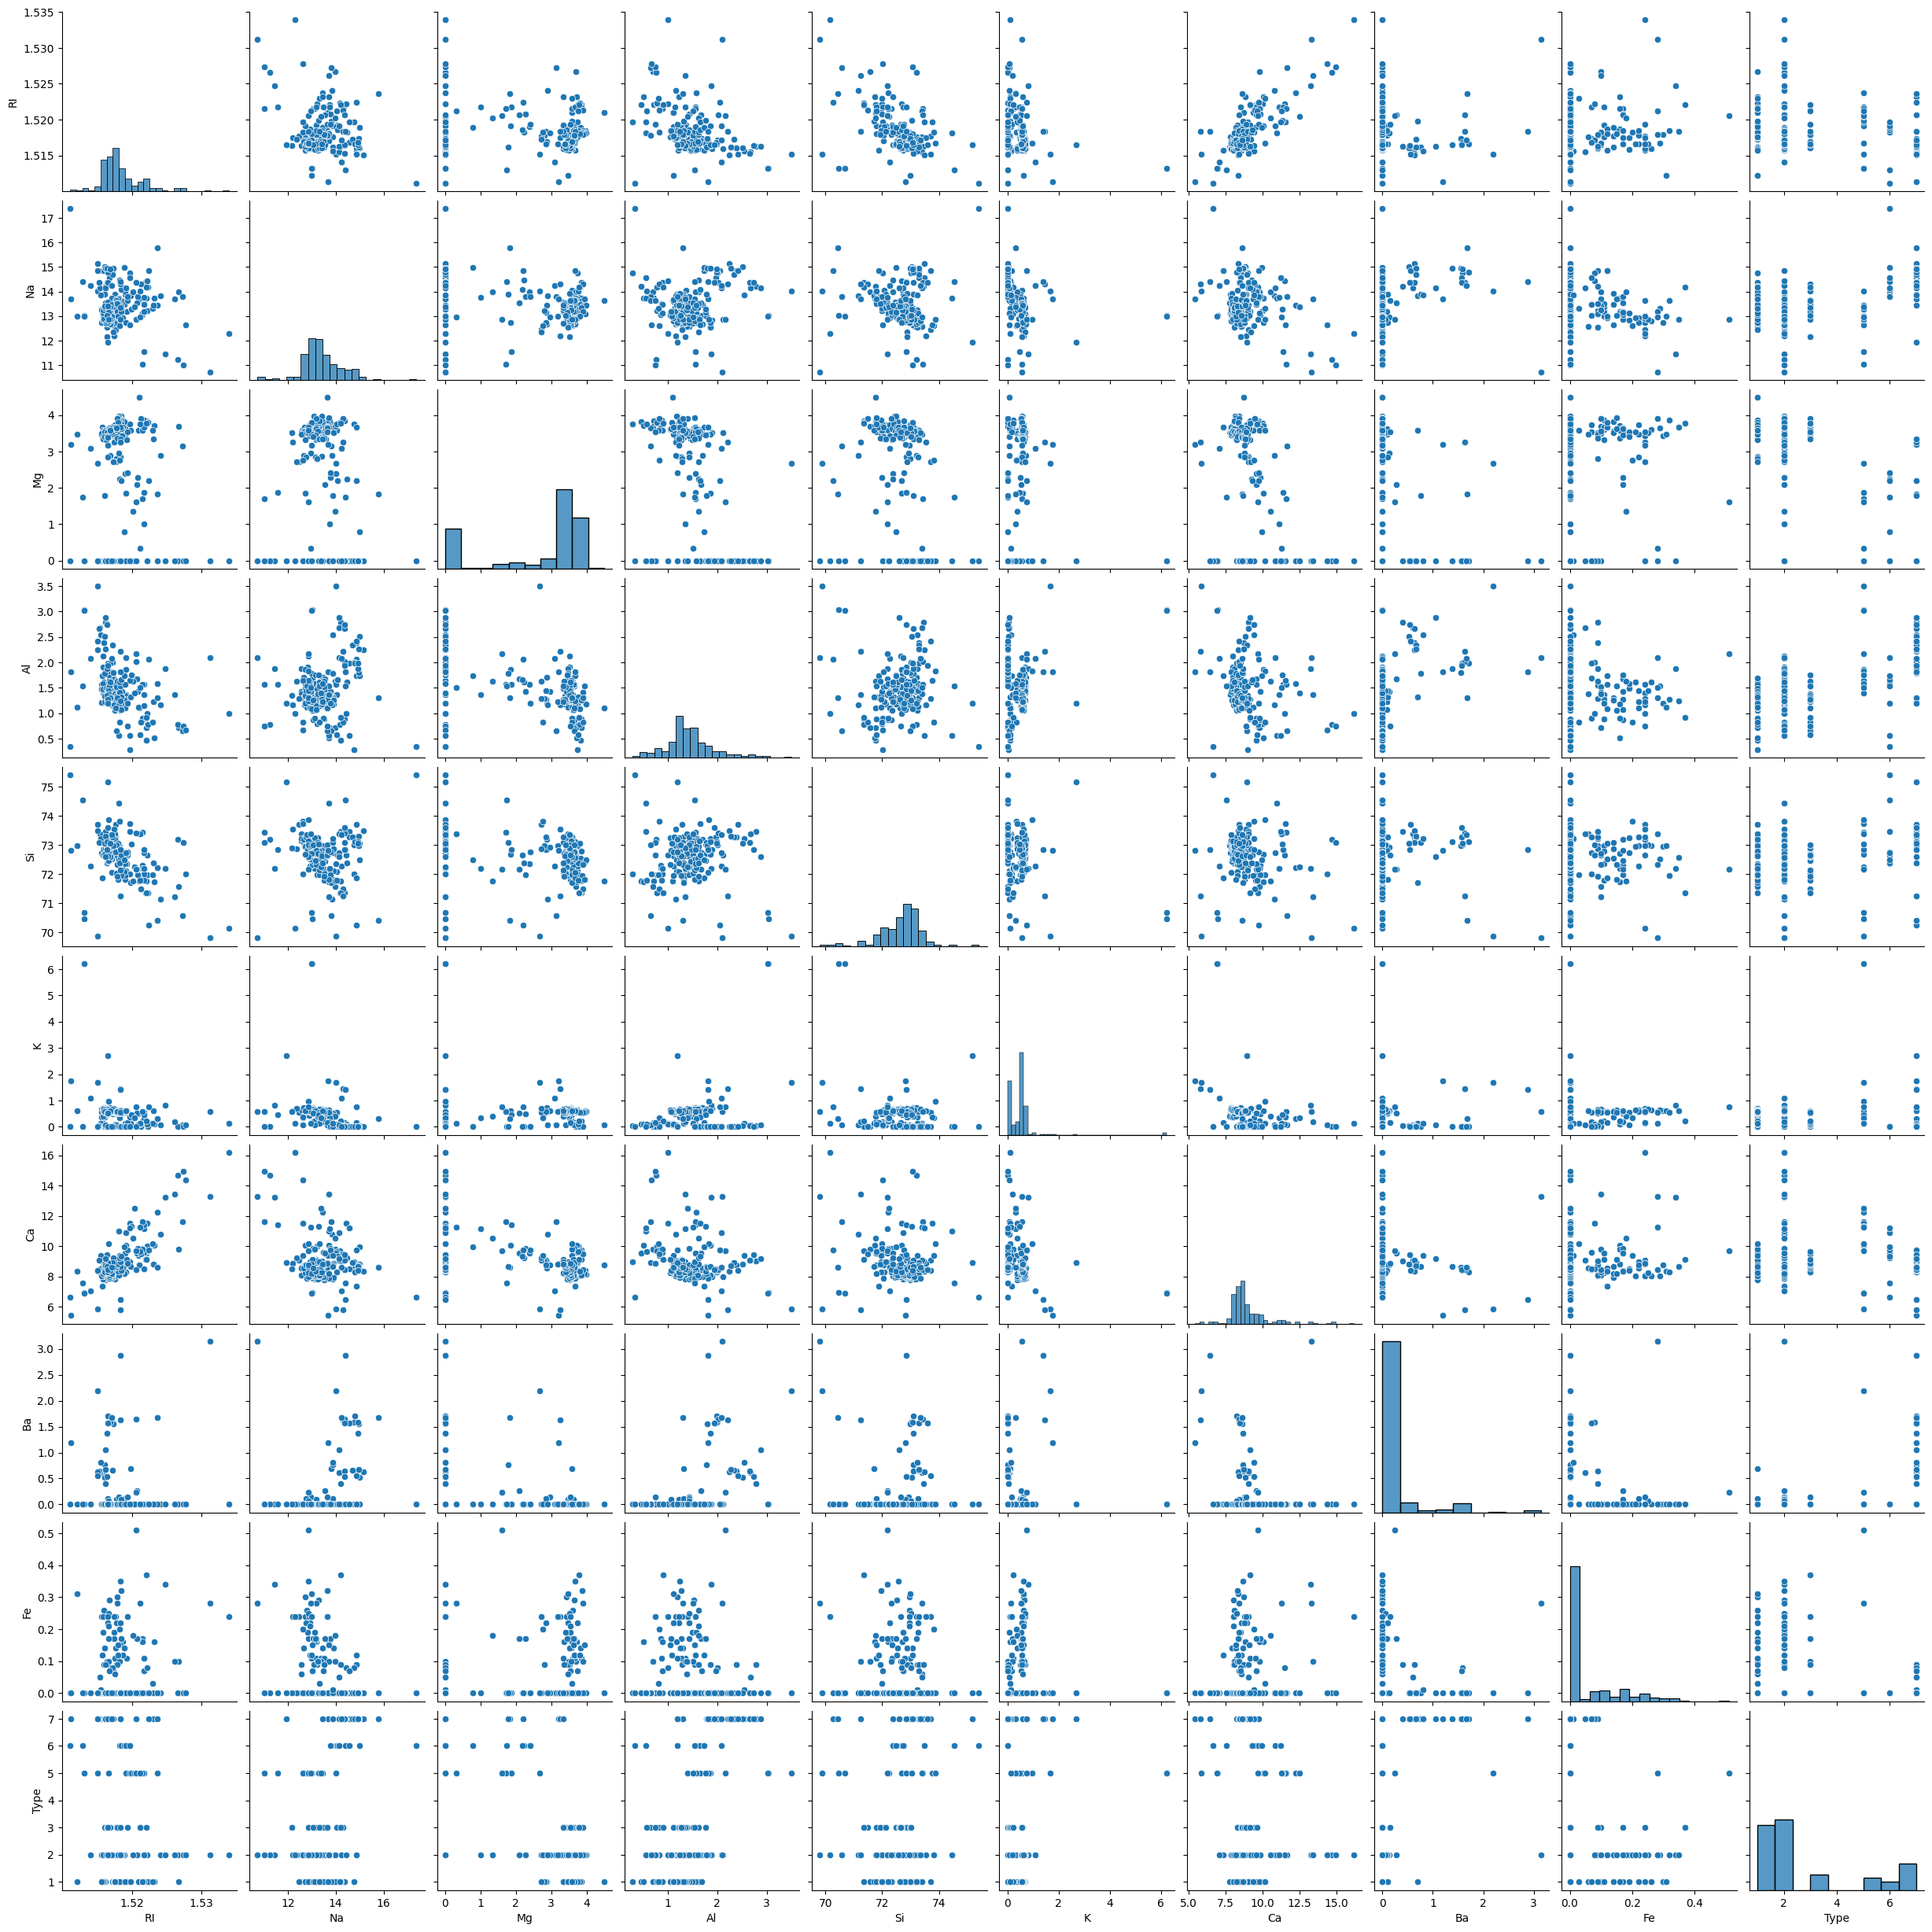

In [ ]:
sns.pairplot(df)

In [ ]:
# # it looks so confusing that is why we need PCA(Principal Component Analysis), lets start
df1=df.iloc[:, :9] # remove type , because we dont try to classify , we are trying to reduce dimensionality
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
#Center the data
df_cntr=df1-df1.mean()
df_cntr.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.002645,0.23215,1.805467,-0.344907,-0.870935,-0.437056,-0.206963,-0.175047,-0.057009
1,-0.000755,0.48215,0.915467,-0.084907,0.079065,-0.017056,-1.126963,-0.175047,-0.057009
2,-0.002185,0.12215,0.865467,0.095093,0.339065,-0.107056,-1.176963,-0.175047,-0.057009
3,-0.000705,-0.19785,1.005467,-0.154907,-0.040935,0.072944,-0.736963,-0.175047,-0.057009
4,-0.000945,-0.13785,0.935467,-0.204907,0.429065,0.052944,-0.886963,-0.175047,-0.057009


In [ ]:
# Fit a PCA model with 3 components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_cntr)

PCA(n_components=3)

In [ ]:
pca.explained_variance_ratio_

array([0.47620525, 0.26319276, 0.10780043])

First Principal Component (PC1):
The first value, 0.47620525, indicates that PC1 explains approximately 47.62% of the total variance, capturing a significant portion of the dataset's information.

Second Principal Component (PC2):
The second value, 0.26319276, shows that PC2 accounts for about 26.32% of the variance, contributing substantially to the dataset's structure.

Third Principal Component (PC3):
The third value, 0.10780043, indicates that PC3 explains roughly 10.78% of the variance, capturing a noteworthy amount of information despite being less significant than the first two components.


 ##### Together, these three components explain around 84.72% of the total variance in the data (47.62% + 26.32% + 10.78%). This suggests that a substantial portion of the dataset's variability can be represented by these three components.

In [ ]:
pca.components_

array([[-0.00092813, -0.01722483,  0.72353491, -0.04633522,  0.00769381,
         0.07840429, -0.6797168 , -0.07635801, -0.0009057 ],
       [ 0.00152291, -0.39879755,  0.54305099, -0.25884075, -0.19409249,
        -0.10382664,  0.61672464, -0.22354513,  0.01678426],
       [-0.00137689, -0.65493473, -0.13119888,  0.05565214,  0.69195133,
         0.21856507, -0.07877842, -0.13387643,  0.00721253]])

In [ ]:
df_cntr.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

- PC1: higher= MG , lower: CA
- PC2: higher=  MG, CA, lower= NA,AL
- PC3: higher=SI, K Lower: NA

In [ ]:
DF_trnsf=pd.DataFrame(pca.transform(df_cntr), columns=['PC1', 'PC2','PC3'])
DF_trnsf.head()

,PC1,PC2,PC3
0,1.431425,1.102115,-1.066958
1,1.436707,-0.343585,-0.277824
2,1.427322,-0.345720,0.138708
3,1.257825,0.249060,0.057742
4,1.312466,0.018405,0.357510


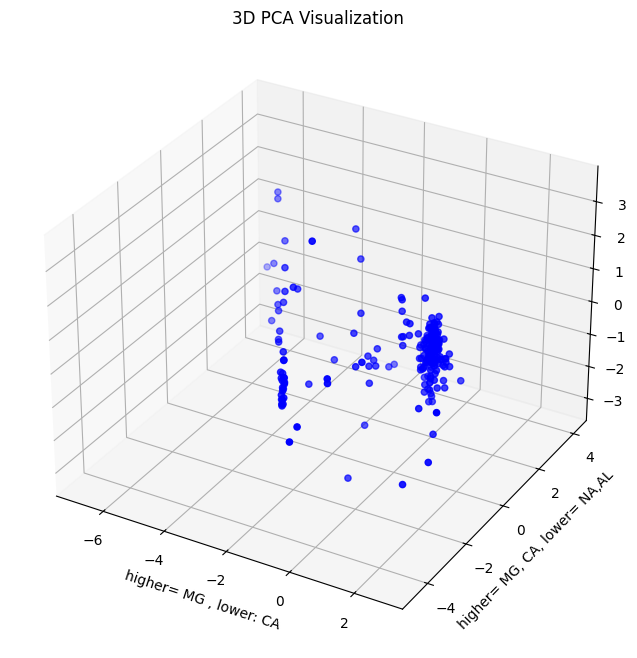

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(DF_trnsf['PC1'], DF_trnsf['PC2'], DF_trnsf['PC3'], c='b', marker='o')
ax.set_xlabel('higher= MG , lower: CA')
ax.set_ylabel('higher= MG, CA, lower= NA,AL')
ax.set_zlabel('higher=SI, K Lower: NA')
ax.set_title('3D PCA Visualization')

plt.show()

/var/folders/ny/6t80lgd179sbyd1ypw2379bc0000gn/T/ipykernel_4435/4057542234.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


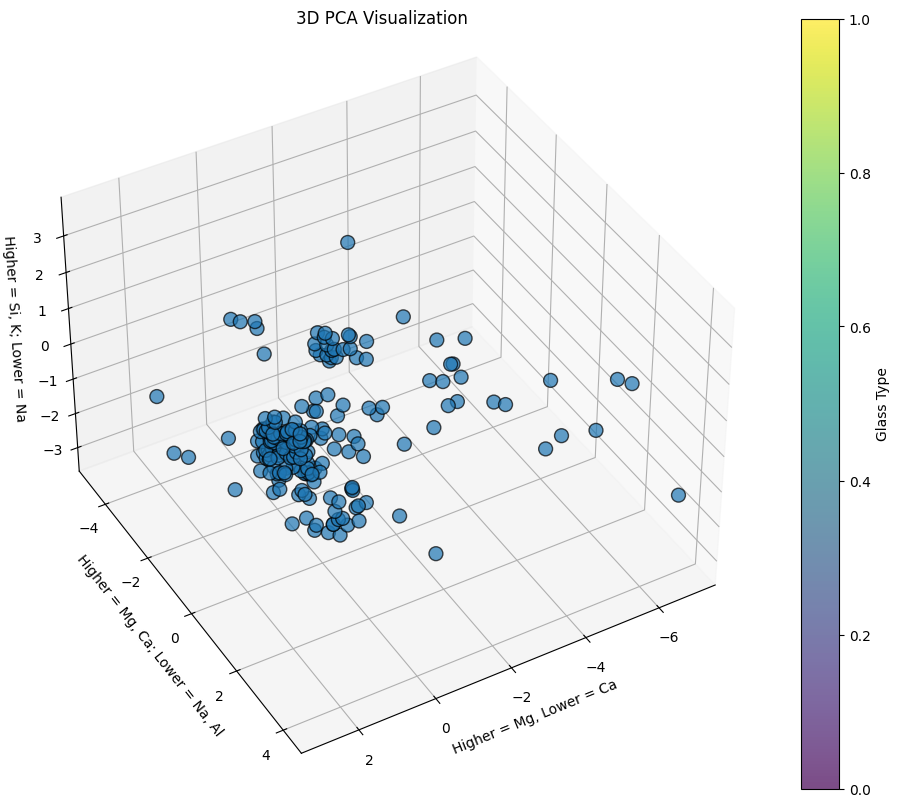

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(DF_trnsf['PC1'], DF_trnsf['PC2'], DF_trnsf['PC3'], cmap='viridis',  marker='o',edgecolor='k',s=100, alpha=0.7 )
cbar = plt.colorbar(scatter)
cbar.set_label('Glass Type')

ax.set_xlabel('Higher = Mg, Lower = Ca')
ax.set_ylabel('Higher = Mg, Ca; Lower = Na, Al')
ax.set_zlabel('Higher = Si, K; Lower = Na')
ax.set_title('3D PCA Visualization')

ax.view_init(elev=40, azim=60)
ax.grid(True)
plt.show()

In [ ]:
# 3d view doesnt give much information, using 2d scatter is suitable for interpretation

In [ ]:
# Fit a PCA model with 2 components
pca = PCA(n_components=2)
pca.fit(df_cntr)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.47620525, 0.26319276])

-  two components alone explain about 73.94% of the variance (47.62% + 26.32%), which may be sufficient for many applications, allowing you to reduce dimensionality while retaining most of the important information.

In [ ]:
pca.components_

array([[-0.00092813, -0.01722483,  0.72353491, -0.04633522,  0.00769381,
         0.07840429, -0.6797168 , -0.07635801, -0.0009057 ],
       [ 0.00152291, -0.39879755,  0.54305099, -0.25884075, -0.19409249,
        -0.10382664,  0.61672464, -0.22354513,  0.01678426]])

In [ ]:
df_cntr.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

- PC1: higher= MG , lower: CA
- PC2: higher=  MG, CA, lower= NA,AL,Ba

Text(0, 0.5, 'PC2: Higher Mg, Higher Ca, Lower Na')

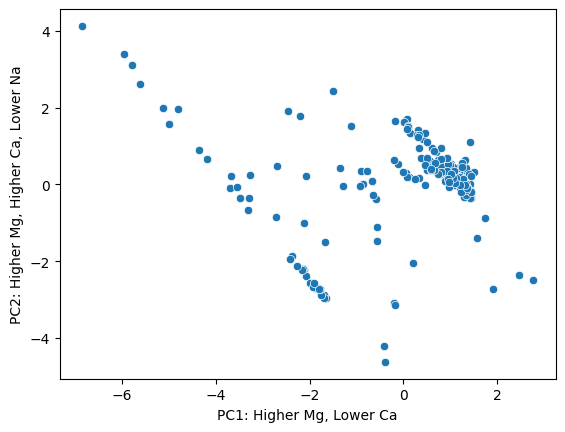

In [ ]:
DF_trnsf1=pd.DataFrame(pca.transform(df_cntr), columns=['PC1', 'PC2'])

sns.scatterplot(x='PC1', y='PC2', data=DF_trnsf1)
plt.xlabel('PC1: Higher Mg, Lower Ca')
plt.ylabel('PC2: Higher Mg, Higher Ca, Lower Na')

- PC1 (X-axis): This shows how much Magnesium (Mg) is in  samples versus Calcium (Ca).
- #### *Higher PC1 values mean more Mg and less Ca.*
- PC2 (Y-axis): This shows a mix of features, mainly Mg, Ca, and Sodium (Na).
- #### *Higher PC2 values mean more Mg and Ca, and less Na.*

All the original features contribute to the principal components, but some (like Mg, Ca, and Na) have a stronger influence than others (like Al and Fe).
The PCA scatter plot visually represents how the most important features (captured in PC1 and PC2) affect the data's overall structure.